In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('./dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
img2 = cv2.resize(img2, (600, 600))

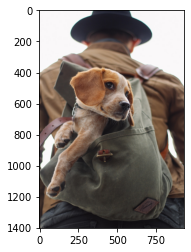

In [4]:
plt.imshow(img1)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [7]:
img2.shape

(600, 600, 3)

In [8]:
rows, cols, channels = img2.shape

In [9]:
roi = img1[y_offset:1401, x_offset:943]

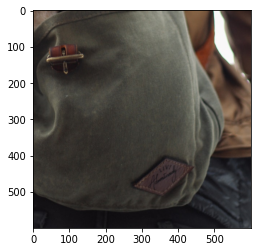

In [10]:
plt.imshow(roi)

In [12]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

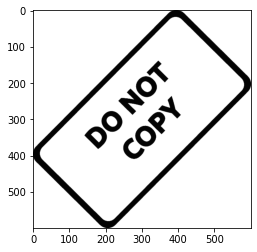

In [14]:
plt.imshow(img2_gray, cmap='gray')

In [16]:
mask_inv = cv2.bitwise_not(img2_gray)

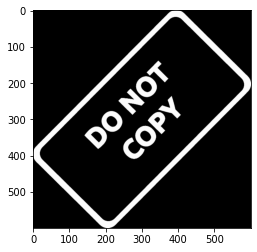

In [18]:
plt.imshow(mask_inv, cmap='gray')

In [19]:
mask_inv.shape

(600, 600)

In [20]:
import numpy as np

In [21]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [22]:
white_background.shape

(600, 600, 3)

In [23]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [25]:
bk.shape

(600, 600, 3)

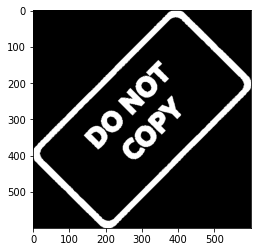

In [26]:
plt.imshow(bk)

In [27]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

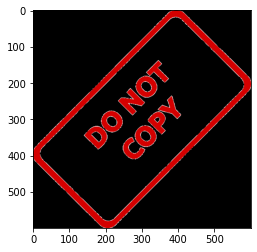

In [28]:
plt.imshow(fg)

In [29]:
final_roi = cv2.bitwise_or(roi, fg)

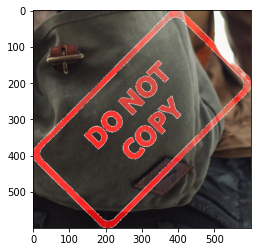

In [30]:
plt.imshow(final_roi)

In [32]:
large_img = img1
small_img = final_roi

In [34]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

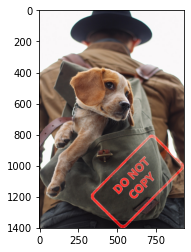

In [36]:
plt.imshow(large_img)